In [75]:
import pandas as pd
import warnings as wr
wr.filterwarnings('ignore')

In [76]:
df = pd.read_csv('./datasets/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [78]:
df.Gender = le.fit_transform(df[['Gender']])

In [79]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [80]:
df.tail()

,Gender,Height,Weight
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405
8554,0,60.921791,131.253738


# Go Ahead

# EDA

In [81]:
# Check the shape of the dataset
print(f"Dataset Shape: {df.shape}")

# Check for missing values
print(df.isnull().sum())

# Get basic statistics
print(df.describe())

# Check data types
print(df.info())

Dataset Shape: (8555, 3)
Gender    0
Height    0
Weight    0
dtype: int64
            Gender       Height       Weight
count  8555.000000  8555.000000  8555.000000
mean      0.584454    66.809925   165.632735
std       0.492845     3.851454    32.043922
min       0.000000    54.616858    65.780000
25%       0.000000    63.957684   139.876803
50%       1.000000    66.985923   168.521567
75%       1.000000    69.604427   190.666305
max       1.000000    80.450000   269.989698
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   int64  
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 200.6 KB
None


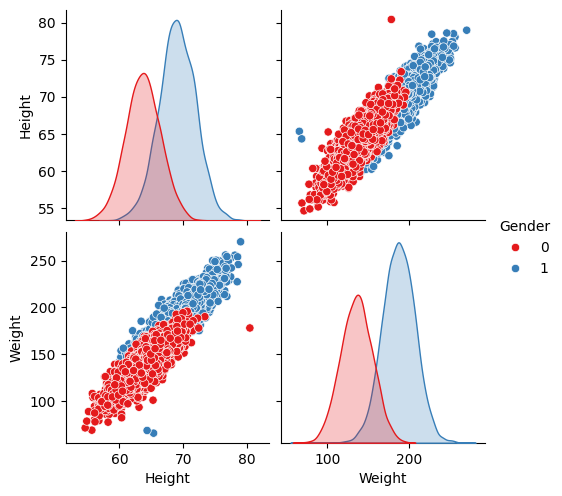

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pair plot for all features
sns.pairplot(df, hue='Gender', palette='Set1')
plt.show()

          Gender    Height    Weight
Gender  1.000000  0.682524  0.790208
Height  0.682524  1.000000  0.922975
Weight  0.790208  0.922975  1.000000


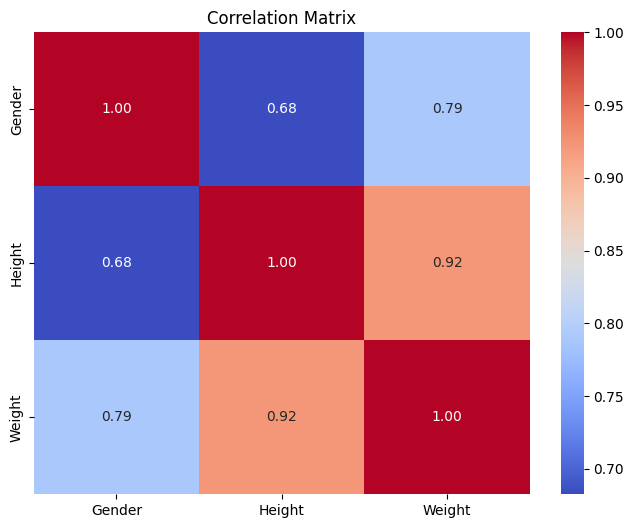

In [83]:
# Correlation heatmap
correlation_matrix = df.corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

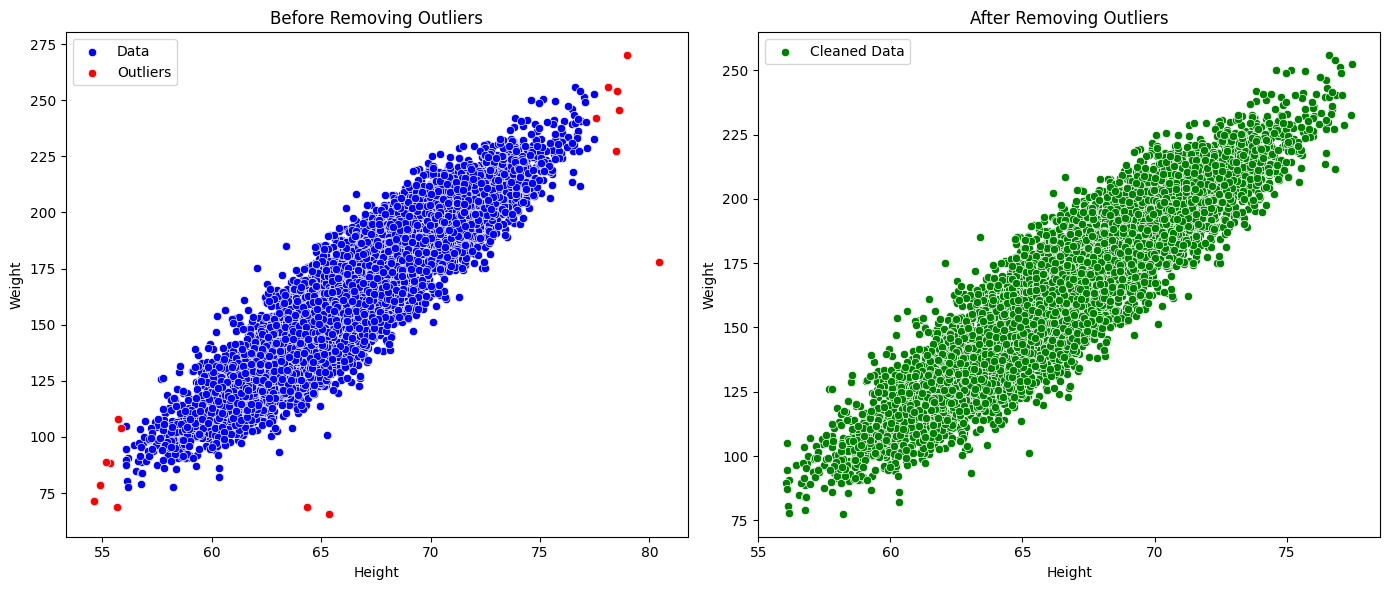

Original Dataset Size: (8555, 3)
Number of Outliers Detected: 16
Cleaned Dataset Size: (8539, 3)


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = df

# Function to detect outliers using IQR
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.4 * IQR
    upper_bound = Q3 + 1.4 * IQR
    return (column < lower_bound) | (column > upper_bound)

# Detect outliers for Height and Weight
height_outliers = detect_outliers_iqr(data['Height'])
weight_outliers = detect_outliers_iqr(data['Weight'])

# Combine outlier masks
outliers_mask = height_outliers | weight_outliers

# Separate outliers and non-outliers
outliers = data[outliers_mask]
cleaned_data = data[~outliers_mask]

# Plotting before removing outliers
plt.figure(figsize=(14, 6))

# Raw data with outliers highlighted
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['Height'], y=data['Weight'], color='blue', label='Data')
sns.scatterplot(x=outliers['Height'], y=outliers['Weight'], color='red', label='Outliers')
plt.title('Before Removing Outliers')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()

# Plotting after removing outliers
plt.subplot(1, 2, 2)
sns.scatterplot(x=cleaned_data['Height'], y=cleaned_data['Weight'], color='green', label='Cleaned Data')
plt.title('After Removing Outliers')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()

plt.tight_layout()
plt.show()

# Summary of data sizes
print(f"Original Dataset Size: {data.shape}")
print(f"Number of Outliers Detected: {outliers.shape[0]}")
print(f"Cleaned Dataset Size: {cleaned_data.shape}")

## Test Train Split

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split

def split_data(X, y):

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    print("Training set size:", X_train.shape[0])
    print("Validation set size:", X_val.shape[0])
    print("Testing set size:", X_test.shape[0])

    return X_train, X_val, X_test, y_train, y_val, y_test

### Graph Visualization

In [86]:
import matplotlib.pyplot as plt

def plot_four_curves(
    x_values,
    metric1_values,
    metric2_values,
    metric3_values,
    metric4_values,
    titles,
    metric4_std_values,
    x_label='X',
    y_label='Metric',
    colors=['purple', 'green', 'red', 'blue'],
    figsize=(6, 5),
    cv_folds=None
):
    # Create 2x2 grid of plots
    fig, axs = plt.subplots(2, 2, figsize=figsize)

    # Plot 1
    axs[0, 0].plot(x_values, metric1_values, marker='o', color=colors[0])
    axs[0, 0].set_title(titles[0])
    axs[0, 0].set_xlabel(x_label)
    axs[0, 0].set_ylabel(y_label)
    axs[0, 0].grid(True)

    # Plot 2
    axs[0, 1].plot(x_values, metric2_values, marker='o', color=colors[1])
    axs[0, 1].set_title(titles[1])
    axs[0, 1].set_xlabel(x_label)
    axs[0, 1].set_ylabel(y_label)
    axs[0, 1].grid(True)

    # Plot 3
    axs[1, 0].plot(x_values, metric3_values, marker='o', color=colors[2])
    axs[1, 0].set_title(titles[2])
    axs[1, 0].set_xlabel(x_label)
    axs[1, 0].set_ylabel(y_label)
    axs[1, 0].grid(True)

    # Plot 4 
    axs[1, 1].plot(x_values, metric4_values, marker='o', color=colors[3])
    axs[1, 1].errorbar(x_values, metric4_values, yerr=metric4_std_values, fmt='none',
                          color=colors[3],  alpha=0.3,capsize=5 )
    axs[1, 1].set_title(titles[3])
    axs[1, 1].set_xlabel(x_label)
    axs[1, 1].set_ylabel(y_label)
    axs[1, 1].grid(True)

    plt.tight_layout()
    plt.show()

### Model Evaluator

In [87]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def polynomial_regression(X_train, X_val, X_test, y_train, y_val, y_test, poly_degrees, cv_folds=5):
    print("\nPolynomial Regression (Degrees):")

    degrees = []
    train_r2s = []
    val_r2s = []
    test_r2s = []
    cv_mean_r2s = []
    cv_std_r2s = []

    for degree in poly_degrees:
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_val_poly = poly.transform(X_val)
        X_test_poly = poly.transform(X_test)

        lr = LinearRegression()
        lr.fit(X_train_poly, y_train)

        train_r2 = lr.score(X_train_poly, y_train)
        val_r2 = lr.score(X_val_poly, y_val)
        test_r2 = lr.score(X_test_poly, y_test)
        test_mse = mean_squared_error(y_test, lr.predict(X_test_poly))

        cv_scores = cross_val_score(lr, X_train_poly, y_train, cv=cv_folds, scoring='r2')
        cv_mean_r2 = np.mean(cv_scores)
        cv_std_r2 = np.std(cv_scores)

        degrees.append(degree)
        train_r2s.append(train_r2)
        val_r2s.append(val_r2)
        test_r2s.append(test_r2)
        cv_mean_r2s.append(cv_mean_r2)
        cv_std_r2s.append(cv_std_r2)

        print(f"Degree {degree}:")
        print(f"Train R²: {train_r2:.4f}")
        print(f"Val R²: {val_r2:.4f}")
        print(f"Test R²: {test_r2:.4f}")
        print(f"Test MSE: {test_mse:.4f}")
        print(f"CV Mean R² (k={cv_folds}): {cv_mean_r2:.4f} (±{cv_std_r2:.4f})")

    
    plot_four_curves(
        x_values=degrees,
        metric1_values=train_r2s,
        metric2_values=val_r2s,
        metric3_values=test_r2s,
        metric4_values=cv_mean_r2s,
        metric4_std_values=cv_std_r2s,
        x_label=f'Polynomial Degree {poly_degrees}',
        y_label='R²',
        titles=['Train R²', 'Validation R²', 'Test R²', 'CV Mean R²'],
        cv_folds=cv_folds
    )

In [88]:
# variables
X = df[['Gender', 'Height']]
y = df['Weight']

X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

Training set size: 5988
Validation set size: 1283
Testing set size: 1284


# Least Squared Linear Regression


Polynomial Regression (Degrees):
Degree 1:
Train R²: 0.8974
Val R²: 0.9100
Test R²: 0.9017
Test MSE: 99.4985
CV Mean R² (k=5): 0.8968 (±0.0095)


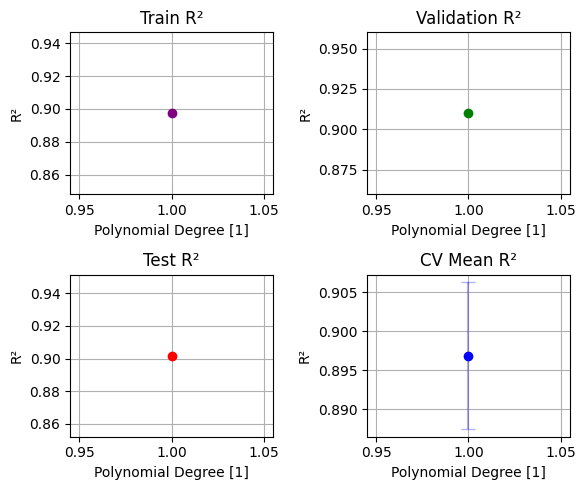

In [89]:
polynomial_regression(X_train, X_val, X_test, y_train, y_val, y_test, [1]) #just degree = 1 [least-square]


# Regression Problem


Polynomial Regression (Degrees):
Degree 2:
Train R²: 0.8974
Val R²: 0.9100
Test R²: 0.9016
Test MSE: 99.5569
CV Mean R² (k=5): 0.8966 (±0.0099)
Degree 3:
Train R²: 0.8977
Val R²: 0.9096
Test R²: 0.9014
Test MSE: 99.7878
CV Mean R² (k=5): 0.8958 (±0.0108)
Degree 4:
Train R²: 0.8980
Val R²: 0.9096
Test R²: 0.9017
Test MSE: 99.4657
CV Mean R² (k=5): 0.8959 (±0.0111)
Degree 5:
Train R²: 0.8981
Val R²: 0.9096
Test R²: 0.9017
Test MSE: 99.4383
CV Mean R² (k=5): 0.8960 (±0.0110)


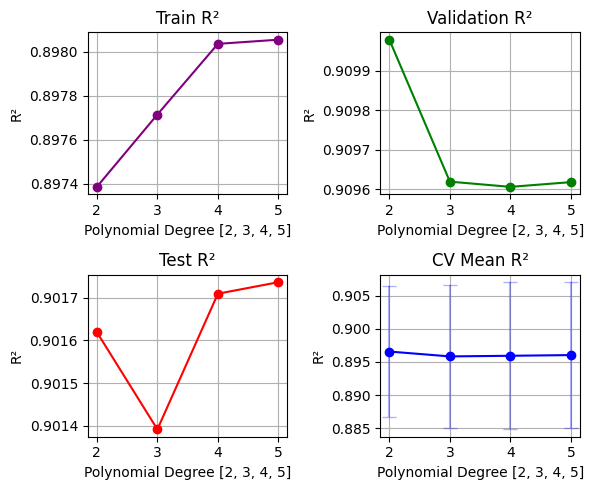

In [90]:
polynomial_regression(X_train, X_val, X_test, y_train, y_val, y_test, [2, 3, 4, 5])

In [91]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

def knn_regressor(X_train, X_val, X_test, y_train, y_val, y_test, n_neighbors_range):

    print("\nKNN Regressor (n_neighbors):")
    k_values = []
    train_accs = []
    val_accs = []
    test_accs = []
    cv_mean_accs = []
    cv_std_accs = []

    for n in n_neighbors_range:
        # Set up KNN with K neighbors
        knn = KNeighborsRegressor(n_neighbors=n)
        knn.fit(X_train, y_train)

        # Single-split evaluation
        train_r2 = knn.score(X_train, y_train)
        val_r2 = knn.score(X_val, y_val)
        test_r2 = knn.score(X_test, y_test)
        test_mse = mean_squared_error(y_test, knn.predict(X_test))

        # Cross-validation on training data
        cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='r2')
        cv_mean_r2 = np.mean(cv_scores)
        cv_std_r2 = np.std(cv_scores)


        #append data to list for showing plot
        k_values.append(n)
        train_accs.append(train_r2)
        val_accs.append(val_r2)
        test_accs.append(test_r2)
        cv_mean_accs.append(cv_mean_r2)
        cv_std_accs.append(cv_std_r2)

        # Print results
        print(f"n_neighbors {n}:")
        print(f"Train R²: {train_r2:.4f}")
        print(f"Val R²: {val_r2:.4f}")
        print(f"Test R²: {test_r2:.4f}")
        print(f"Test MSE: {test_mse:.4f}")
        print(f"CV Mean R² (k=5): {cv_mean_r2:.4f} (±{cv_std_r2:.4f})")
        print("")

    plot_four_curves(
            x_values=k_values,
            metric1_values=train_accs,
            metric2_values=val_accs,
            metric3_values=test_accs,
            metric4_values=cv_mean_accs,
            metric4_std_values=cv_std_accs,
            x_label=f'Number of Neighbors {n_neighbors_range[0]} - {n_neighbors_range[-1]}',
            y_label='Accuracy',
            titles=['Train Accuracy', 'Validation Accuracy', 'Test Accuracy', 'CV Mean Accuracy'],
            cv_folds=5
    )





KNN Regressor (n_neighbors):
n_neighbors 1:
Train R²: 1.0000
Val R²: 0.8003
Test R²: 0.7860
Test MSE: 216.6069
CV Mean R² (k=5): 0.7916 (±0.0117)

n_neighbors 2:
Train R²: 0.9489
Val R²: 0.8537
Test R²: 0.8426
Test MSE: 159.2814
CV Mean R² (k=5): 0.8434 (±0.0099)

n_neighbors 3:
Train R²: 0.9305
Val R²: 0.8730
Test R²: 0.8628
Test MSE: 138.8261
CV Mean R² (k=5): 0.8617 (±0.0104)

n_neighbors 4:
Train R²: 0.9218
Val R²: 0.8808
Test R²: 0.8715
Test MSE: 130.0464
CV Mean R² (k=5): 0.8711 (±0.0112)

n_neighbors 5:
Train R²: 0.9172
Val R²: 0.8875
Test R²: 0.8765
Test MSE: 124.9313
CV Mean R² (k=5): 0.8753 (±0.0109)

n_neighbors 6:
Train R²: 0.9134
Val R²: 0.8911
Test R²: 0.8810
Test MSE: 120.4713
CV Mean R² (k=5): 0.8784 (±0.0108)

n_neighbors 7:
Train R²: 0.9109
Val R²: 0.8937
Test R²: 0.8828
Test MSE: 118.5548
CV Mean R² (k=5): 0.8807 (±0.0112)

n_neighbors 8:
Train R²: 0.9090
Val R²: 0.8949
Test R²: 0.8867
Test MSE: 114.6991
CV Mean R² (k=5): 0.8823 (±0.0113)

n_neighbors 9:
Train R²: 0

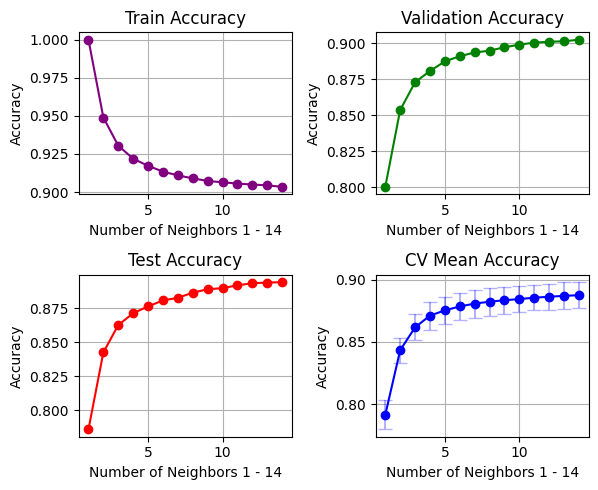

In [92]:
knn_regressor(X_train, X_val, X_test, y_train, y_val, y_test, list(range(1, 15)))

# Classification Problem

In [93]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

def knn_classifier(X_train, X_val, X_test, y_train, y_val, y_test, n_neighbors_range):
    k_values = []
    train_accs = []
    val_accs = []
    test_accs = []
    cv_mean_accs = []
    cv_std_accs = []

    for n in n_neighbors_range:
        k_values.append(n)
        
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)

        # Single-split evaluation
        train_acc = accuracy_score(y_train, knn.predict(X_train))
        train_accs.append(train_acc)

        val_acc = accuracy_score(y_val, knn.predict(X_val))
        val_accs.append(val_acc)

        test_acc = accuracy_score(y_test, knn.predict(X_test))
        test_accs.append(test_acc)

        # Cross-validation on training data 
        cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
        cv_mean_acc = np.mean(cv_scores)
        cv_mean_accs.append(cv_mean_acc)

        cv_std_acc = np.std(cv_scores)
        cv_std_accs.append(cv_std_acc)

        # Print results
        print(f"n_neighbors {n}:")
        print(f"Train Accuracy: {train_acc:.4f}")
        print(f"Val Accuracy: {val_acc:.4f}")
        print(f"Test Accuracy: {test_acc:.4f}")
        print(f"CV Mean Accuracy (k=5): {cv_mean_acc:.4f} (±{cv_std_acc:.4f})")
        print("")

    plot_four_curves(
      x_values=k_values,
      metric1_values=train_accs,
      metric2_values=val_accs,
      metric3_values=test_accs,
      metric4_values=cv_mean_accs,
      metric4_std_values=cv_std_accs,
      x_label=f'Number of Neighbors {n_neighbors_range[0]} - {n_neighbors_range[-1]}',
      y_label='Accuracy',
      titles=['Train Accuracy', 'Validation Accuracy', 'Test Accuracy', 'CV Mean Accuracy'],
      cv_folds=5
      )


In [94]:
df2 = pd.read_csv('./datasets/weight-height.csv')
df2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [95]:
# variables
X = df2[['Height', 'Weight']]
y = df2['Gender']

X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

Training set size: 5988
Validation set size: 1283
Testing set size: 1284


n_neighbors 1:
Train Accuracy: 1.0000
Val Accuracy: 0.8667
Test Accuracy: 0.8754
CV Mean Accuracy (k=5): 0.8731 (±0.0116)

n_neighbors 2:
Train Accuracy: 0.9357
Val Accuracy: 0.8745
Test Accuracy: 0.8785
CV Mean Accuracy (k=5): 0.8734 (±0.0165)

n_neighbors 3:
Train Accuracy: 0.9367
Val Accuracy: 0.9026
Test Accuracy: 0.9003
CV Mean Accuracy (k=5): 0.9020 (±0.0119)

n_neighbors 4:
Train Accuracy: 0.9285
Val Accuracy: 0.9080
Test Accuracy: 0.9034
CV Mean Accuracy (k=5): 0.9005 (±0.0124)

n_neighbors 5:
Train Accuracy: 0.9292
Val Accuracy: 0.9158
Test Accuracy: 0.9104
CV Mean Accuracy (k=5): 0.9065 (±0.0098)

n_neighbors 6:
Train Accuracy: 0.9250
Val Accuracy: 0.9158
Test Accuracy: 0.9151
CV Mean Accuracy (k=5): 0.9065 (±0.0118)

n_neighbors 7:
Train Accuracy: 0.9267
Val Accuracy: 0.9236
Test Accuracy: 0.9120
CV Mean Accuracy (k=5): 0.9082 (±0.0112)

n_neighbors 8:
Train Accuracy: 0.9237
Val Accuracy: 0.9213
Test Accuracy: 0.9151
CV Mean Accuracy (k=5): 0.9087 (±0.0123)

n_neighbors 9:
T

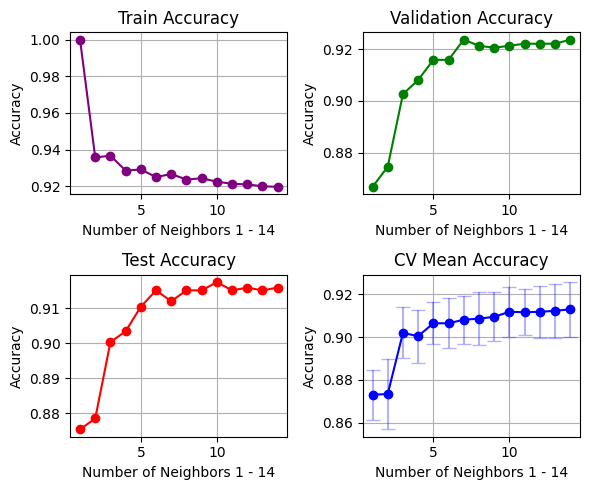

In [96]:
# Run KNN Classifier
knn_classifier(X_train, X_val, X_test, y_train, y_val, y_test,list(range(1, 15)))